In [1]:
from lxml import html
import dateutil.parser 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

In [2]:
def generate_dataframe(file_path):
    root = html.parse(file_path)

    elements = root.xpath('//*[@class="_3-96 _2pio _2lek _2lel"]')
    names=[name.text_content() for name in elements]

    elements = root.xpath('//*[@class="_3-96 _2let"]')
    texts=[text.text_content() for text in elements]

    elements = root.xpath('//*[@class="_3-94 _2lem"]')
    times=[dateutil.parser.parse(time.text_content()) for time in elements]

    d = {'name': names, 'text': texts, 'time': times}
    df = pd.DataFrame(data=d)
    return  df.set_index('time')

In [3]:
path_to_messages = r'C:\Users\Wojtek\Documents\facebook-wojciechwaniek\messages\inbox\InessaAlaverdyan_AVEDZbe2yw'

df1=generate_dataframe(os.path.join(path_to_messages, "message_1.html"))
df2=generate_dataframe(os.path.join(path_to_messages, "message_2.html"))
df3=generate_dataframe(os.path.join(path_to_messages, "message_3.html"))

In [4]:
conversation=pd.concat([df1,df2,df3]).sort_index()
len(conversation)

22380

In [5]:
conversation.dtypes

name    object
text    object
dtype: object

In [6]:
ns_in_min=10**9*60

conversation['since_previous_message']=conversation.index.to_series().diff(1)
conversation['minutes_since_previous_message']=conversation.since_previous_message.astype(np.int64)/ns_in_min
conversation.head()

name  \
time                                     
2018-08-07 11:39:00  Inessa Alaverdyan   
2018-08-19 15:09:00  Inessa Alaverdyan   
2018-08-19 15:09:00  Inessa Alaverdyan   
2018-08-19 17:52:00    Wojciech Waniek   
2018-08-19 18:40:00  Inessa Alaverdyan   

                                                                  text  \
time                                                                     
2018-08-07 11:39:00        Say hi to your new Facebook friend, Inessa.   
2018-08-19 15:09:00                       https://youtu.be/BtMd6PbscwE   
2018-08-19 15:09:00                              Not a spam message :)   
2018-08-19 17:52:00  I wonder what it is... We are at the airport n...   
2018-08-19 18:40:00  You will see...(a wicked emoji) you can click ...   

                     since_previous_message  minutes_since_previous_message  
time                                                                         
2018-08-07 11:39:00                     NaT                   -1.537229e+08  
2018-08-19 15:09:00        12 days 03:30:00                    1.749000e+04  
2018-08-19 15:09:00         0 days 00:00:00                    0.000000e+00  
2018-08-19 17:52:00         0 days 02:43:00                    1.630000e+02  
2018-08-19 18:40:00         0 days 00:48:00                    4.800000e+01

In [7]:
conversation['was_the_previous_message_from_a_different_person']=(conversation['name']!=conversation['name'].shift())
conversation.head()

name  \
time                                     
2018-08-07 11:39:00  Inessa Alaverdyan   
2018-08-19 15:09:00  Inessa Alaverdyan   
2018-08-19 15:09:00  Inessa Alaverdyan   
2018-08-19 17:52:00    Wojciech Waniek   
2018-08-19 18:40:00  Inessa Alaverdyan   

                                                                  text  \
time                                                                     
2018-08-07 11:39:00        Say hi to your new Facebook friend, Inessa.   
2018-08-19 15:09:00                       https://youtu.be/BtMd6PbscwE   
2018-08-19 15:09:00                              Not a spam message :)   
2018-08-19 17:52:00  I wonder what it is... We are at the airport n...   
2018-08-19 18:40:00  You will see...(a wicked emoji) you can click ...   

                     since_previous_message  minutes_since_previous_message  \
time                                                                          
2018-08-07 11:39:00                     NaT                   -1.537229e+08   
2018-08-19 15:09:00        12 days 03:30:00                    1.749000e+04   
2018-08-19 15:09:00         0 days 00:00:00                    0.000000e+00   
2018-08-19 17:52:00         0 days 02:43:00                    1.630000e+02   
2018-08-19 18:40:00         0 days 00:48:00                    4.800000e+01   

                    was_the_previous_message_from_a_different_person  
time                                                                  
2018-08-07 11:39:00                                             True  
2018-08-19 15:09:00                                            False  
2018-08-19 15:09:00                                            False  
2018-08-19 17:52:00                                             True  
2018-08-19 18:40:00                                             True

In [8]:
messages_after_different_person=conversation[conversation.was_the_previous_message_from_a_different_person==True][1:]
messages_after_different_person.head()

name  \
time                                     
2018-08-19 17:52:00    Wojciech Waniek   
2018-08-19 18:40:00  Inessa Alaverdyan   
2018-08-26 20:32:00    Wojciech Waniek   
2018-08-27 04:20:00  Inessa Alaverdyan   
2018-12-25 15:01:00    Wojciech Waniek   

                                                                  text  \
time                                                                     
2018-08-19 17:52:00  I wonder what it is... We are at the airport n...   
2018-08-19 18:40:00  You will see...(a wicked emoji) you can click ...   
2018-08-26 20:32:00  Finally I watched it, I almost forgot but I li...   
2018-08-27 04:20:00                            There is one more photo   
2018-12-25 15:01:00  Thanks, I will look at it!   I heard from Karo...   

                     since_previous_message  minutes_since_previous_message  \
time                                                                          
2018-08-19 17:52:00         0 days 02:43:00                           163.0   
2018-08-19 18:40:00         0 days 00:48:00                            48.0   
2018-08-26 20:32:00         7 days 01:52:00                         10192.0   
2018-08-27 04:20:00         0 days 07:48:00                           468.0   
2018-12-25 15:01:00         0 days 00:07:00                             7.0   

                    was_the_previous_message_from_a_different_person  
time                                                                  
2018-08-19 17:52:00                                             True  
2018-08-19 18:40:00                                             True  
2018-08-26 20:32:00                                             True  
2018-08-27 04:20:00                                             True  
2018-12-25 15:01:00                                             True

In [9]:
messages_after_different_person.groupby('name').mean()

minutes_since_previous_message  \
name                                                
Inessa Alaverdyan                       30.972855   
Wojciech Waniek                         43.660277   

                  was_the_previous_message_from_a_different_person  
name                                                                
Inessa Alaverdyan                                             True  
Wojciech Waniek                                               True

In [10]:
messages_after_different_person_wojtek=messages_after_different_person[messages_after_different_person.name=='Wojciech Waniek']
messages_after_different_person_inessa=messages_after_different_person[messages_after_different_person.name=='Inessa Alaverdyan']

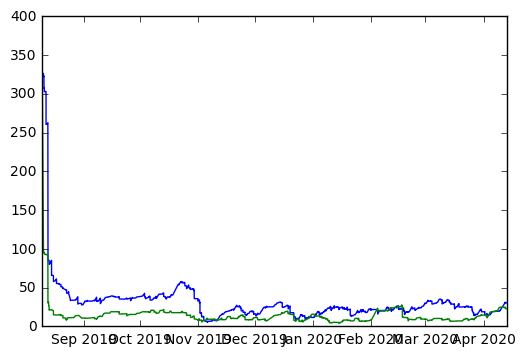

In [11]:
minutes_since_previous_message_rolling_mean_wojtek = messages_after_different_person_wojtek['minutes_since_previous_message'].rolling(300).mean()
minutes_since_previous_message_rolling_mean_inessa = messages_after_different_person_inessa['minutes_since_previous_message'].rolling(300).mean()

plt.plot(messages_after_different_person_wojtek.index, minutes_since_previous_message_rolling_mean_wojtek)
plt.plot(messages_after_different_person_inessa.index, minutes_since_previous_message_rolling_mean_inessa)


plt.show()

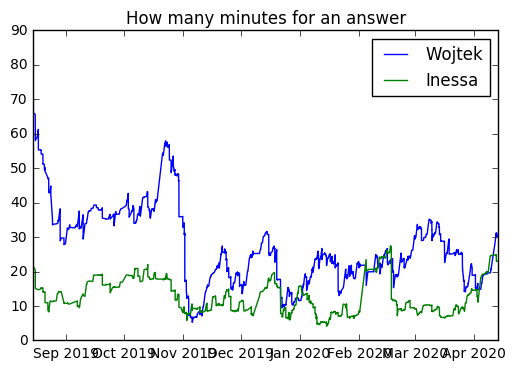

In [12]:
number_of_initial_messages =400

plt.title("How many minutes for an answer")
plt.plot(messages_after_different_person_wojtek.index[number_of_initial_messages:], minutes_since_previous_message_rolling_mean_wojtek[number_of_initial_messages:], label = "Wojtek")
plt.plot(messages_after_different_person_inessa.index[number_of_initial_messages:], minutes_since_previous_message_rolling_mean_inessa[number_of_initial_messages:], label = "Inessa")
plt.legend()

plt.show()

In [13]:
messages_after_long_brake=messages_after_different_person[messages_after_different_person["minutes_since_previous_message"]>60*5]
messages_after_long_brake["name"].value_counts()

Wojciech Waniek      129
Inessa Alaverdyan     66
Name: name, dtype: int64

In [14]:
messages_after_long_brake

name  \
time                                     
2018-08-26 20:32:00    Wojciech Waniek   
2018-08-27 04:20:00  Inessa Alaverdyan   
2019-02-20 09:56:00  Inessa Alaverdyan   
2019-02-20 21:20:00    Wojciech Waniek   
2019-02-21 08:06:00    Wojciech Waniek   
2019-02-24 22:05:00    Wojciech Waniek   
2019-02-27 23:25:00  Inessa Alaverdyan   
2019-02-28 12:06:00    Wojciech Waniek   
2019-03-01 13:42:00    Wojciech Waniek   
2019-03-12 12:27:00    Wojciech Waniek   
2019-03-25 16:24:00    Wojciech Waniek   
2019-04-02 19:24:00    Wojciech Waniek   
2019-04-16 19:15:00    Wojciech Waniek   
2019-04-30 11:49:00  Inessa Alaverdyan   
2019-05-04 14:25:00  Inessa Alaverdyan   
2019-05-05 08:59:00    Wojciech Waniek   
2019-06-09 12:56:00    Wojciech Waniek   
2019-07-01 12:44:00  Inessa Alaverdyan   
2019-07-01 20:16:00    Wojciech Waniek   
2019-07-02 13:32:00    Wojciech Waniek   
2019-07-03 05:44:00  Inessa Alaverdyan   
2019-07-03 19:38:00  Inessa Alaverdyan   
2019-07-06 18:56:00    Wojciech Waniek   
2019-07-08 20:44:00    Wojciech Waniek   
2019-07-11 07:57:00    Wojciech Waniek   
2019-07-11 17:59:00    Wojciech Waniek   
2019-07-12 21:35:00  Inessa Alaverdyan   
2019-07-15 08:02:00    Wojciech Waniek   
2019-07-15 14:28:00    Wojciech Waniek   
2019-07-16 09:11:00    Wojciech Waniek   
...                                ...   
2020-02-22 11:40:00    Wojciech Waniek   
2020-02-22 17:35:00    Wojciech Waniek   
2020-02-25 08:00:00  Inessa Alaverdyan   
2020-02-25 14:25:00    Wojciech Waniek   
2020-02-28 08:33:00    Wojciech Waniek   
2020-02-29 17:29:00    Wojciech Waniek   
2020-03-02 08:12:00    Wojciech Waniek   
2020-03-05 08:17:00  Inessa Alaverdyan   
2020-03-08 10:29:00    Wojciech Waniek   
2020-03-10 09:18:00    Wojciech Waniek   
2020-03-12 12:15:00    Wojciech Waniek   
2020-03-17 08:34:00    Wojciech Waniek   
2020-03-18 18:16:00    Wojciech Waniek   
2020-03-21 09:02:00  Inessa Alaverdyan   
2020-03-22 07:50:00  Inessa Alaverdyan   
2020-03-25 05:03:00  Inessa Alaverdyan   
2020-03-27 10:09:00  Inessa Alaverdyan   
2020-03-27 17:06:00    Wojciech Waniek   
2020-03-28 07:33:00  Inessa Alaverdyan   
2020-03-29 09:29:00    Wojciech Waniek   
2020-03-30 08:23:00    Wojciech Waniek   
2020-03-30 14:40:00  Inessa Alaverdyan   
2020-04-02 18:02:00    Wojciech Waniek   
2020-04-03 08:26:00  Inessa Alaverdyan   
2020-04-04 09:58:00  Inessa Alaverdyan   
2020-04-04 19:36:00    Wojciech Waniek   
2020-04-05 09:38:00    Wojciech Waniek   
2020-04-09 07:38:00  Inessa Alaverdyan   
2020-04-11 21:23:00    Wojciech Waniek   
2020-04-12 10:26:00    Wojciech Waniek   

                                                                  text  \
time                                                                     
2018-08-26 20:32:00  Finally I watched it, I almost forgot but I li...   
2018-08-27 04:20:00                            There is one more photo   
2019-02-20 09:56:00  Hi)) I'm going to Poland next week will be in ...   
2019-02-20 21:20:00  I had an intense day... I did some climbing to...   
2019-02-21 08:06:00  You can stay at my place for one night then. C...   
2019-02-24 22:05:00  Do you have any wishes for Wednesday?   Here i...   
2019-02-27 23:25:00  We finish at 3:10 and the bus leaves at 3:28, ...   
2019-02-28 12:06:00                   They moved my classes to 12:30 😕   
2019-03-01 13:42:00  I just arrived at the airport. I was at work i...   
2019-03-12 12:27:00  Ask Karol what he thinks. For me after 12. O5 ...   
2019-03-25 16:24:00  no, I didn't even have a full day. We thought ...   
2019-04-02 19:24:00             some photos from Budapest. I forgot :(   
2019-04-16 19:15:00  Escher, that's the name. I tried to remind mys...   
2019-04-30 11:49:00     Hej, are you still planning to come to Sweden?   
2019-05-04 14:25:00  Happy Birthday Wojtek, hope you have great tim...   
2019-05-05 08:59:00                True 🙂. Stupid me😆Inessa Alaverdyan   
2019-06-09 12:56:00  Finally I reached the highest peak

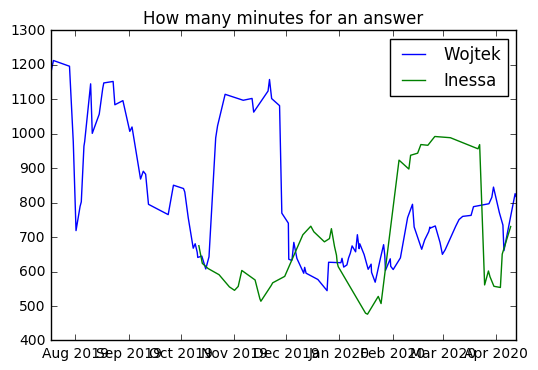

In [15]:
messages_after_long_brake_wojtek=messages_after_long_brake[messages_after_long_brake.name=='Wojciech Waniek']
messages_after_long_brake_inessa=messages_after_long_brake[messages_after_long_brake.name=='Inessa Alaverdyan']

minutes_since_previous_long_brake_message_rolling_mean_wojtek = messages_after_long_brake_wojtek['minutes_since_previous_message'].rolling(10).mean()
minutes_since_previous_long_brake_message_rolling_mean_inessa = messages_after_long_brake_inessa['minutes_since_previous_message'].rolling(10).mean()

number_of_initial_messages =21

plt.title("How many minutes for an answer")
plt.plot(messages_after_long_brake_wojtek.index[number_of_initial_messages:], minutes_since_previous_long_brake_message_rolling_mean_wojtek[number_of_initial_messages:], label = "Wojtek")
plt.plot(messages_after_long_brake_inessa.index[number_of_initial_messages:], minutes_since_previous_long_brake_message_rolling_mean_inessa[number_of_initial_messages:], label = "Inessa")
plt.legend()

plt.show()

In [16]:
conversation['text'].value_counts()

                                                                                                                                                                                                                          907
😅                                                                                                                                                                                                                         197
Click for audio                                                                                                                                                                                                           176
:D                                                                                                                                                                                                                        168
😂😂😂                                                                                                             